<a href="https://colab.research.google.com/github/HarishGarampalle/Assignment2/blob/Projects/Housedata_Predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Importing  standard Libraries

In [215]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

##Loadinging the raw house data

In [216]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [217]:
data = pd.read_csv('/content/drive/MyDrive/ITC Data Science/Data Science Training/Assignment1-20-01-2025/raw_house_data.csv')

##Data Preprocessing

In [218]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MLS               5000 non-null   int64  
 1   sold_price        5000 non-null   float64
 2   zipcode           5000 non-null   int64  
 3   longitude         5000 non-null   float64
 4   latitude          5000 non-null   float64
 5   lot_acres         4990 non-null   float64
 6   taxes             5000 non-null   float64
 7   year_built        5000 non-null   int64  
 8   bedrooms          5000 non-null   int64  
 9   bathrooms         4994 non-null   float64
 10  sqrt_ft           4944 non-null   float64
 11  garage            4993 non-null   float64
 12  kitchen_features  4967 non-null   object 
 13  fireplaces        5000 non-null   object 
 14  floor_covering    4999 non-null   object 
 15  HOA               4438 non-null   object 
dtypes: float64(8), int64(4), object(4)
memory 

In [219]:
# Check - missing values
print("Initial Missing Values:")
print(data.isnull().sum())

Initial Missing Values:
MLS                   0
sold_price            0
zipcode               0
longitude             0
latitude              0
lot_acres            10
taxes                 0
year_built            0
bedrooms              0
bathrooms             6
sqrt_ft              56
garage                7
kitchen_features     33
fireplaces            0
floor_covering        1
HOA                 562
dtype: int64


In [220]:
data['HOA'] = pd.to_numeric(data['HOA'], errors='coerce')
data['fireplaces'] = pd.to_numeric(data['fireplaces'], errors='coerce')

In [221]:
data['fireplaces'].fillna(0,inplace=True)
data['HOA'].fillna(0, inplace=True)

<ipython-input-221-eb7bca8fb99f>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['fireplaces'].fillna(0,inplace=True)
<ipython-input-221-eb7bca8fb99f>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df

In [222]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MLS               5000 non-null   int64  
 1   sold_price        5000 non-null   float64
 2   zipcode           5000 non-null   int64  
 3   longitude         5000 non-null   float64
 4   latitude          5000 non-null   float64
 5   lot_acres         4990 non-null   float64
 6   taxes             5000 non-null   float64
 7   year_built        5000 non-null   int64  
 8   bedrooms          5000 non-null   int64  
 9   bathrooms         4994 non-null   float64
 10  sqrt_ft           4944 non-null   float64
 11  garage            4993 non-null   float64
 12  kitchen_features  4967 non-null   object 
 13  fireplaces        5000 non-null   float64
 14  floor_covering    4999 non-null   object 
 15  HOA               5000 non-null   float64
dtypes: float64(10), int64(4), object(2)
memory

In [223]:
data.describe()

,MLS,sold_price,zipcode,longitude,latitude,lot_acres,taxes,year_built,bedrooms,bathrooms,sqrt_ft,garage,fireplaces,HOA
count,5.000000e+03,5.000000e+03,5000.000000,5000.000000,5000.000000,4990.000000,5.000000e+03,5000.00000,5000.000000,4994.000000,4944.000000,4993.000000,5000.000000,5000.000000
mean,2.127070e+07,7.746262e+05,85723.025600,-110.912107,32.308512,4.661317,9.402828e+03,1992.32800,3.933800,3.829896,3716.366828,2.816143,1.875800,73.209218
std,2.398508e+06,3.185556e+05,38.061712,0.120629,0.178028,51.685230,1.729385e+05,65.48614,1.245362,1.387063,1120.683515,1.192946,1.141506,90.815459
min,3.042851e+06,1.690000e+05,85118.000000,-112.520168,31.356362,0.000000,0.000000e+00,0.00000,1.000000,1.000000,1100.000000,0.000000,0.000000,0.000000
25%,2.140718e+07,5.850000e+05,85718.000000,-110.979260,32.277484,0.580000,4.803605e+03,1987.00000,3.000000,3.000000,3047.000000,2.000000,1.000000,0.000000
50%,2.161469e+07,6.750000e+05,85737.000000,-110.923420,32.318517,0.990000,6.223760e+03,1999.00000,4.000000,4.000000,3512.000000,3.000000,2.000000,44.000000
75%,2.180480e+07,8.350000e+05,85749.000000,-110.859078,32.394334,1.757500,8.082830e+03,2006.00000,4.000000,4.000000,4130.250000,3.000000,3.000000,122.000000
max,2.192856e+07,5.300000e+06,86323.000000,-109.454637,34.927884,2154.000000,1.221508e+07,2019.00000,36.000000,36.000000,22408.000000,30.000000,9.000000,925.000000


In [224]:
print(data.isnull().sum())

MLS                  0
sold_price           0
zipcode              0
longitude            0
latitude             0
lot_acres           10
taxes                0
year_built           0
bedrooms             0
bathrooms            6
sqrt_ft             56
garage               7
kitchen_features    33
fireplaces           0
floor_covering       1
HOA                  0
dtype: int64


In [225]:
data['kitchen_features'].fillna('Unknown', inplace=True)
data['floor_covering'].fillna('other', inplace=True)

<ipython-input-225-025323e58a11>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['kitchen_features'].fillna('Unknown', inplace=True)
<ipython-input-225-025323e58a11>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)'

In [226]:
print(data.isnull().sum())

MLS                  0
sold_price           0
zipcode              0
longitude            0
latitude             0
lot_acres           10
taxes                0
year_built           0
bedrooms             0
bathrooms            6
sqrt_ft             56
garage               7
kitchen_features     0
fireplaces           0
floor_covering       0
HOA                  0
dtype: int64


In [227]:
#replacing NaN with 0
data['garage'].fillna(0, inplace=True)
#Dropping the NaN column
data.dropna(inplace = True)

<ipython-input-227-25584a2d42d5>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['garage'].fillna(0, inplace=True)


In [228]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4944 entries, 0 to 4999
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MLS               4944 non-null   int64  
 1   sold_price        4944 non-null   float64
 2   zipcode           4944 non-null   int64  
 3   longitude         4944 non-null   float64
 4   latitude          4944 non-null   float64
 5   lot_acres         4944 non-null   float64
 6   taxes             4944 non-null   float64
 7   year_built        4944 non-null   int64  
 8   bedrooms          4944 non-null   int64  
 9   bathrooms         4944 non-null   float64
 10  sqrt_ft           4944 non-null   float64
 11  garage            4944 non-null   float64
 12  kitchen_features  4944 non-null   object 
 13  fireplaces        4944 non-null   float64
 14  floor_covering    4944 non-null   object 
 15  HOA               4944 non-null   float64
dtypes: float64(10), int64(4), object(2)
memory usag

In [229]:
data.shape

(4944, 16)

##Feature Engineering

In [230]:
#creating new coulumn - total_rooms
data['total_rooms'] = data['bedrooms']+data['bathrooms']

In [231]:
#creating new coulumn - price_sqrft
data['price_sqrft'] = data['sold_price']/data['sqrt_ft']

In [232]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4944 entries, 0 to 4999
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MLS               4944 non-null   int64  
 1   sold_price        4944 non-null   float64
 2   zipcode           4944 non-null   int64  
 3   longitude         4944 non-null   float64
 4   latitude          4944 non-null   float64
 5   lot_acres         4944 non-null   float64
 6   taxes             4944 non-null   float64
 7   year_built        4944 non-null   int64  
 8   bedrooms          4944 non-null   int64  
 9   bathrooms         4944 non-null   float64
 10  sqrt_ft           4944 non-null   float64
 11  garage            4944 non-null   float64
 12  kitchen_features  4944 non-null   object 
 13  fireplaces        4944 non-null   float64
 14  floor_covering    4944 non-null   object 
 15  HOA               4944 non-null   float64
 16  total_rooms       4944 non-null   float64
 17  

In [233]:
data['price_sqrft'].min(), max(data['price_sqrft'])

(24.544805426633346, 1208.3333333333333)

In [234]:
#Creating bins
price_sqrft_bins = list(range(0, int(data["price_sqrft"].max()+100), 100))
bin_length = len(price_sqrft_bins)
print(bin_length), print(price_sqrft_bins)

14
[0, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200, 1300]


(None, None)

In [235]:
# data['price_sqrft_category'] = pd.qcut(data['price_sqrft'], q = 20, labels=False)

In [236]:
# print(range(bin_length))

In [237]:
#new column of bins
data["price_sqrft_category"] = pd.cut(data["price_sqrft"], bins=price_sqrft_bins, labels=range(1,bin_length), right=False)

data[["price_sqrft", "price_sqrft_category"]].head(100)

,price_sqrft,price_sqrft_category
0,504.761905,6
1,575.342466,6
3,498.946668,5
4,533.372420,6
5,475.007308,5
...,...,...
96,370.448772,4
97,535.082873,6
98,559.032967,6
99,303.308824,4


In [238]:
data['price_sqrft_category'].min(),data['price_sqrft_category'].max()

(1, 13)

In [239]:
data['price_sqrft_category'] = pd.to_numeric(data['price_sqrft_category'], errors='coerce')

In [240]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4944 entries, 0 to 4999
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   MLS                   4944 non-null   int64  
 1   sold_price            4944 non-null   float64
 2   zipcode               4944 non-null   int64  
 3   longitude             4944 non-null   float64
 4   latitude              4944 non-null   float64
 5   lot_acres             4944 non-null   float64
 6   taxes                 4944 non-null   float64
 7   year_built            4944 non-null   int64  
 8   bedrooms              4944 non-null   int64  
 9   bathrooms             4944 non-null   float64
 10  sqrt_ft               4944 non-null   float64
 11  garage                4944 non-null   float64
 12  kitchen_features      4944 non-null   object 
 13  fireplaces            4944 non-null   float64
 14  floor_covering        4944 non-null   object 
 15  HOA                   4944

##Kitchen_features and floor_covering scaling

In [241]:
data['kitchen_features_count']=data['kitchen_features'].apply(lambda x: len(x.split(',')) if x else 0)

In [242]:
data['floor_covering_count']=data['floor_covering'].apply(lambda x: len(x.split(',')) if x else 0)

In [243]:
data = data.drop('kitchen_features', axis = 1)


In [244]:
data= data.drop('floor_covering', axis=1)

In [245]:
#data['price_sqrft_category'] = pd.to_numeric(data['price_sqrft_category'], errors='coerce')

##Creating new table with geographical and price per square foot columns

In [246]:
geo_data = data[["longitude", "latitude", "price_sqrft_category"]]

In [247]:
geo_data.to_csv('/content/drive/MyDrive/ITC Data Science/Data Science Training/Assignment1-20-01-2025/geo_data_1.csv', index=False)

In [248]:
data_geo = pd.read_csv('/content/drive/MyDrive/ITC Data Science/Data Science Training/Assignment1-20-01-2025/geo_data_1.csv')

In [249]:
data_geo


,longitude,latitude,price_sqrft_category
0,-110.378200,31.356362,6
1,-111.045371,31.594213,6
2,-111.035925,31.645878,5
3,-110.813768,32.285162,6
4,-110.910593,32.339090,5
...,...,...,...
4939,-110.661829,31.907917,2
4940,-110.858556,32.316373,3
4941,-110.755428,32.964708,3
4942,-111.055528,32.296871,2


##splitting the Geo-data into train and test

In [250]:
# data_geo_train = data_geo.sample(frac=0.9, random_state=42)
# data_geo_test = data_geo.drop(data_geo_train.index)

In [251]:
#Geo data for classifier without splitting train and test
Xy_train=data_geo.to_numpy()

#Geo data for classifier by splitting train and test
# Xy_train=data_geo_train.to_numpy()
# Xy_test=data_geo_test.to_numpy()

In [252]:
# Xy_train, Xy_test

In [253]:
X_train_geo=Xy_train[:,0:2]
X_train = (X_train_geo - np.mean(X_train_geo, axis=0)) / np.std(X_train_geo, axis=0)

In [254]:
# X_test_geo=Xy_test[:,0:2]
# X_test = (X_test_geo - np.mean(X_test_geo, axis=0)) / np.std(X_test_geo, axis=0)

In [255]:
# X_train.shape, X_train

In [256]:
# X_test.shape, X_test

In [257]:
# type(X_train)

In [258]:
y_train = Xy_train[:,-1]
# y_test = Xy_test[:,-1]

In [259]:
# y_train.shape,y_train, type(y_train)

In [260]:
# y_test.shape,y_test, type(y_test)

##KNN Classifier

In [261]:
class KNNClassifier():
  def fit(self, X,y):
    self.X = X
    self.y = y
  def predict(self,X,K,epsilon = 1e-3):
    N=len(X)
    y_hat = np.zeros(N)
    for i in range(N):
      dist2 = np.sum((self.X-X[i])**2,axis = 1)
      idxt = np.argsort(dist2)[:K]
      gamma_k=1/(np.sqrt(dist2[idxt]+epsilon))
      y_hat[i] = np.bincount(self.y[idxt],weights = gamma_k).argmax()
    return y_hat

In [262]:
geo_knn = KNNClassifier()

In [263]:
y_train = y_train.astype(int)
# y_test = y_test.astype(int)

In [264]:
# y_train

##KNN Training

In [265]:
geo_knn.fit(X_train,y_train)


In [266]:
y_train.min(), y_train.max()

(1, 13)

In [267]:
yhat_train = geo_knn.predict(X_train, K=5)

In [268]:
def accuracy(y_train,yhat_train):
  return np.mean(y_train==yhat_train)

In [269]:
print('Training Accuracy of KNN model with scaling')
accuracy(y_train,yhat_train)

Training Accuracy of KNN model with scaling


0.7625404530744336

Confusion matrix for Training Data - KNN Model


Text(0.5, 47.7222222222222, 'Predicted label')

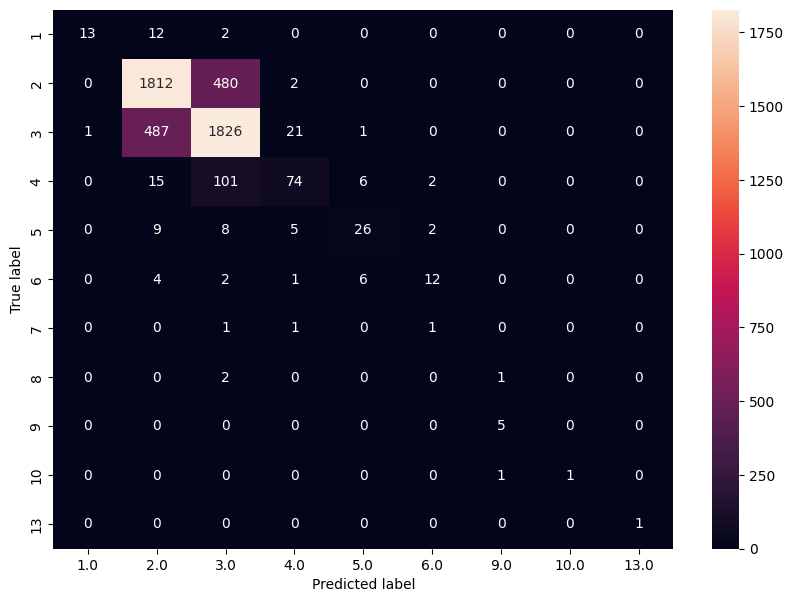

In [270]:
import seaborn as sns
print('Confusion matrix for Training Data - KNN Model')
plt.figure(figsize=(10,7))
y_actu = pd.Series(y_train, name='Actual')
y_pred = pd.Series(yhat_train, name='Predicted')
cm = pd.crosstab(y_actu, y_pred)
ax = sns.heatmap(cm, annot=True, fmt="d")
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [271]:
print(yhat_train)

[6. 3. 3. ... 3. 2. 2.]


In [272]:
yhat_train.min(), yhat_train.max()

(1.0, 13.0)

##KNN Testing

In [273]:
yhat_test = geo_knn.predict(X_test, K=5)

ValueError: operands could not be broadcast together with shapes (4944,2) (6,) 

In [ ]:
def accuracy(y_test,yhat_test):
  return np.mean(y_test==yhat_test)

In [ ]:
print('Testing Accuracy of KNN model with scaling')
accuracy(y_test,yhat_test)

In [ ]:
print('Confusion matrix for Test Data - KNN Model')
plt.figure(figsize=(10,7))
y_actu = pd.Series(y_test, name='Actual')
y_pred = pd.Series(yhat_test, name='Predicted')
cm = pd.crosstab(y_actu, y_pred)
ax = sns.heatmap(cm, annot=True, fmt="d")
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [ ]:
data.info()

##KNN classifier output as a new column

In [274]:
new_bin = pd.DataFrame(yhat_train)

In [275]:
new_bin

,0
0,6.0
1,3.0
2,3.0
3,2.0
4,3.0
...,...
4939,2.0
4940,2.0
4941,3.0
4942,2.0


In [276]:
merged_data = pd.merge(new_bin, data, left_index=True, right_index=True, how='inner')

merged_data.rename(columns={0: 'KNN_Price_Sqft_bin'}, inplace=True)

#Saving the cleaned House Data

In [277]:
merged_data.to_csv('/content/drive/MyDrive/ITC Data Science/Data Science Training/Assignment1-20-01-2025/cleaned_house_data.csv', index=False)

#Loading the cleaned House Data

In [278]:
house_data = pd.read_csv('/content/drive/MyDrive/ITC Data Science/Data Science Training/Assignment1-20-01-2025/cleaned_house_data.csv')

In [279]:
house_data.shape

(4890, 20)

In [280]:
house_data = house_data.drop(columns=['zipcode','MLS','bedrooms','bathrooms'])

In [281]:
house_data.columns

Index(['KNN_Price_Sqft_bin', 'sold_price', 'longitude', 'latitude',
       'lot_acres', 'taxes', 'year_built', 'sqrt_ft', 'garage', 'fireplaces',
       'HOA', 'total_rooms', 'price_sqrft', 'price_sqrft_category',
       'kitchen_features_count', 'floor_covering_count'],
      dtype='object')

##Checking for MultiCollinearity

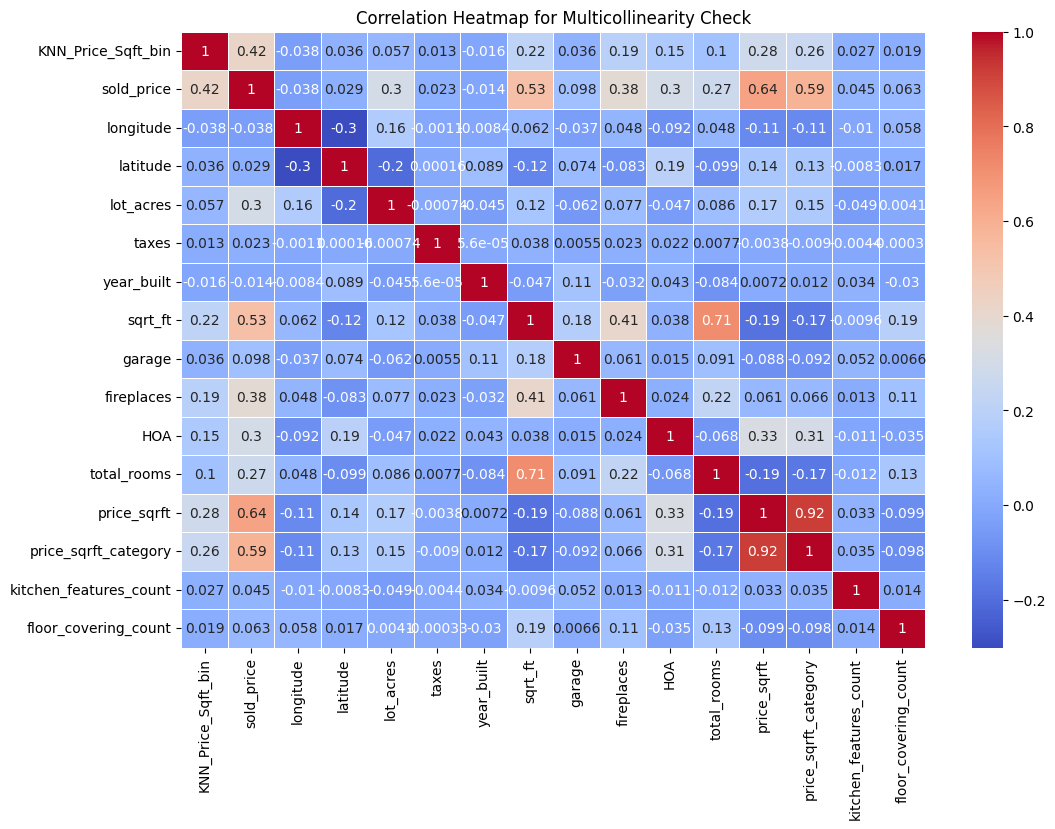

In [282]:
numerical_columns = house_data.select_dtypes(include=['float64', 'int64','int32']).columns

correlation_matrix = house_data[numerical_columns].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap for Multicollinearity Check')
plt.show()

In [283]:
# house = house_data[['sold_price','latitude', 'longitude','price_sqrft_category','kitchen_features_count','floor_covering_count','fireplaces','lot_acres','taxes','year_built','total_rooms']]

In [284]:
house = house_data[['sold_price','total_rooms','kitchen_features_count','floor_covering_count','fireplaces','garage','KNN_Price_Sqft_bin']]

In [285]:
# X_test = np.array([[13,]])

#Splitting the Cleaned House Data into Train and Test for Regression

In [286]:
train_data = house.sample(frac=0.9, random_state=42)
test_data = house.drop(train_data.index)


In [287]:
train_data.shape

(4401, 7)

In [288]:
test_data.shape

(489, 7)

In [289]:
# house_data.columns

##Train Data

In [290]:
train_data = train_data.to_numpy()


In [291]:
train_data

array([[1.6300e+06, 9.0000e+00, 1.3000e+01, ..., 5.0000e+00, 4.0000e+00,
        6.0000e+00],
       [1.9125e+06, 1.3000e+01, 6.0000e+00, ..., 4.0000e+00, 3.0000e+00,
        3.0000e+00],
       [7.2300e+05, 8.0000e+00, 1.4000e+01, ..., 1.0000e+00, 3.0000e+00,
        3.0000e+00],
       ...,
       [1.1500e+06, 1.0000e+01, 5.0000e+00, ..., 3.0000e+00, 3.0000e+00,
        3.0000e+00],
       [7.6500e+05, 7.0000e+00, 5.0000e+00, ..., 3.0000e+00, 3.0000e+00,
        2.0000e+00],
       [1.1490e+06, 1.4000e+01, 9.0000e+00, ..., 5.0000e+00, 6.0000e+00,
        3.0000e+00]])

In [292]:
X_train = train_data[:,1:]
y_train_data = train_data[:,0]

##Scaling X_train features

In [293]:
X_train_data = (X_train - np.mean(X_train, axis=0)) / np.std(X_train, axis=0)

In [294]:
X_train_data.shape,y_train_data.shape

((4401, 6), (4401,))

In [295]:
y_train_data

array([1630000., 1912500.,  723000., ..., 1150000.,  765000., 1149000.])

##Test Data

In [296]:
test_data = test_data.to_numpy()
X_test = test_data[:,1:]
y_test_data = test_data[:,0]

##Scaling X_test features

In [297]:
X_test_data = (X_test - np.mean(X_test, axis=0)) / np.std(X_test, axis=0)

In [298]:
X_test_data.shape, y_test_data.shape

((489, 6), (489,))

#KNN Regressor

In [299]:
class KNNRegressor():
  def fit(self, X,y):
    self.X = X
    self.y = y

  def predict(self, X,K, epsilon = 2e-3):
    N=len(X)
    y_hat = np.zeros(N)

    for i in range(N):
      dist2 = np.sum((self.X-X[i])**2,axis =1)
      idxt = np.argsort(dist2)[:K]
      gamma_k = np.exp(-dist2[idxt])/(np.exp(-dist2[idxt]).sum()+epsilon)
      y_hat[i] = gamma_k.dot(self.y[idxt])
    return y_hat


In [300]:
knnr = KNNRegressor()
knnr.fit(X_train_data,y_train_data)

In [301]:
y_hat_train1=knnr.predict(X_train_data,8)

In [302]:
print(y_hat_train1[0])

1625690.5925952187


In [304]:
y_hat_test = knnr.predict(X_test_data,8)

In [305]:
print(y_hat_test[0])

820561.0898845257


#OLS Multivarient Linear regressor

In [307]:
def MAE(Y, Y_hat):
  return np.sum(np.abs((Y-Y_hat)/Y))

def R2(Y,Y_hat):
  N = len(Y)
  return 1-((np.sum((Y-Y_hat)**2)/np.sum((Y_hat-np.mean(Y))**2)))

def OLS(Y,Y_hat, N):
  return ((1/(2*N))*np.sum((Y-Y_hat)**2))


In [308]:
class MVLinearRegression():
  def fit(self, X,Y, eta=1e-3, epochs=1e3,show_curve = False):
    epochs = int(epochs)
    N, D = X.shape
    Y=Y

    #Begin SGD Optimisation
    self.W = np.random.randn(D)
    self.J = np.zeros(epochs)

    #Stochastic Gradient descent Progression
    for epoch in range(epochs):
      Y_hat = self.predict(X)
      self.J[epoch]=OLS(Y, Y_hat, N)
      #weight update Rule
      self.W -= eta*(1/N)*(X.T@(Y_hat-Y))

    if show_curve:
      plt.figure()
      plt.plot(self.J)
      plt.xlabel("epochs")
      plt.ylabel("$\mathcal{J}$")
      plt.title("Training Curve")

  def predict(self,X):
    return X@self.W

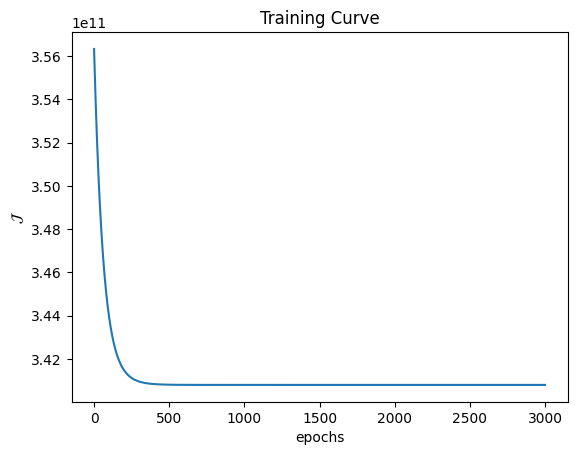

In [309]:
my_reg = MVLinearRegression()
my_reg.fit(X_train_data,y_train_data, eta=6e-3, epochs = 3e3, show_curve = True)

In [310]:
def accuracy(y_test_data, Y_hat):
  return np.mean(y_test_data==Y_hat)

In [311]:
# my_reg.predict(X_test_data)

In [312]:
Y_hat=my_reg.predict(X_train_data)

In [313]:
Y_hat_test=my_reg.predict(X_test_data)

In [314]:
# round(my_reg.predict(X_test)[0],2)

In [315]:
round(knnr.predict(X_test, 8)[0],2)

0.0

In [316]:
#for train
print('MAE value for OLS regressor on Train Data')
MAE(y_train_data, Y_hat)

MAE value for OLS regressor on Train Data


4560.201132663377

In [317]:
#for test
print('MAE value for OLS regressor on Train Data')
MAE(y_test_data, Y_hat_test)

MAE value for OLS regressor on Train Data


506.5859702037901

In [318]:
#for train
print('R2 value for OLS regressor on Train Data')
R2(y_train_data, Y_hat)

R2 value for OLS regressor on Train Data


-0.0634856314676957

In [319]:
#for test
print('R2 value for OLS regressor on Test Data')
R2(y_test_data, Y_hat_test)

R2 value for OLS regressor on Test Data


-0.026658848750185316

In [320]:
#KNN for Train
MAE(y_train_data, y_hat_train1)

681.3272588544501

In [321]:
#KNN for Test
MAE(y_test_data, y_hat_test)

98.52709714729424

In [322]:
#KNN for Train
R2(y_train_data, y_hat_train1)

0.3274933232916144

In [323]:
#KNN for Test
R2(y_test_data, y_hat_test)

-0.3806983588266326

In [324]:
# (round(accuracy(y_test_data,Y_hat),4))

##Predicting the Price using necessary features

##KNN classifier using geographical input

In [325]:
X_test_user = np.array([[-111.045371 , 31.594213 ]])

In [326]:
# X_test_user = (X_test_user - np.mean(X_test_user, axis=0)) / np.std(X_test_user, axis=0)

In [327]:
# latitude, longitude = map(float, input(). split(,))

In [328]:
import folium
my_map = folium.Map(location=(31.594213,-111.045371), zoom_start=5)
display(my_map)

In [329]:
yhat_test_out = geo_knn.predict(X_test_user, K=5)

In [330]:
yhat_test_bin=yhat_test_out[0]

##OLS Regressor price prediction

In [331]:
# [['total_rooms','kitchen_features_count','floor_covering_count','fireplaces','garage','price_sqrft_category']]

In [332]:
X_test_user = np.array([[ 3,2,0,2,3,yhat_test_bin]])

In [333]:
# X_test_user = (X_test_user - np.mean(X_test_user, axis=0)) / np.std(X_test_user, axis=0)

In [334]:
# X_test_user = input('enter the data:Latitude, longitude,total_rooms',np.array([[]])

In [335]:
Y_hat_Rout=my_reg.predict(X_test_user)
Y_hat_Rout


array([735083.64809073])

In [336]:
yhat_Kout = knnr.predict(X_test_user, 5)
yhat_Kout

array([608901.87159761])

#Use Case: Best Properties to invest based on the budget

In [337]:
house.to_csv('/content/drive/MyDrive/ITC Data Science/Data Science Training/Assignment1-20-01-2025/house_predict.csv', index=False)

In [340]:

def properties_by_budget(df, budget_min, budget_max):
    if "sold_price" in df.columns:
        filtered_df = df[(df["sold_price"] >= budget_min) & (df["sold_price"] <= budget_max)][['sold_price','total_rooms','kitchen_features_count', 'floor_covering_count', 'fireplaces']]
        return filtered_df.sort_values(by="sold_price", ascending = False)
    else:
        return "Error: Column 'sold_price' not found in the dataset."




In [341]:
# Load the house predict dataset
df = pd.read_csv('/content/drive/MyDrive/ITC Data Science/Data Science Training/Assignment1-20-01-2025/house_predict.csv')

customer_min_budget = float(input('Enter the customer minimum budget:'))
customer_max_budget = float(input('Enter the customer maximum budget:'))
filtered_properties = properties_by_budget(df, customer_min_budget, customer_max_budget)
print(filtered_properties.head(200))
# filtered_properties.shape

Enter the customer minimum budget:3000000
Enter the customer maximum budget:5000000
    sold_price  total_rooms  kitchen_features_count  floor_covering_count  \
2    4500000.0         12.0                       4                     3   
1    4200000.0          4.0                       2                     2   
7    3700000.0         12.0                       7                     4   
3    3411450.0         10.0                       5                     2   
4    3250000.0          7.0                       5                     3   
8    3250000.0         11.0                      12                     2   
13   3000000.0          6.0                       5                     2   
15   3000000.0          9.0                       9                     2   

    fireplaces  
2          4.0  
1          5.0  
7          1.0  
3          5.0  
4          5.0  
8          2.0  
13         3.0  
15         3.0  


In [ ]:
import folium

In [ ]:
my_map = folium.Map(location=(36.104087829589844,-86.77576446533203), zoom_start=5)
display(my_map)